# Comparison at the station scale 

##  Load required libraries

In [1]:
from pathlib import Path     
import numpy as np      
import pandas as pd   
import netCDF4 as nc    
from netCDF4 import Dataset     
import datetime as dt            
import calendar as cld                      
import matplotlib.pyplot as plt                              
import xarray as xr 
from scipy import stats    
import seaborn as sns     
from seaborn import scatterplot
import matplotlib.cm as cm
import itertools
import os

## Set variables

In [2]:
"""
We define the thresholds used to deduce number of days with snow over land from 
snow cover fraction, snow water equivalent, and snow depth. 
"""

threshold_snc = '1'   
threshold_snd = '0'     

# Set input data path
path_cmip_raw_data = '/home/hchaabani/Data/Snow/snc/cmip6/raw_data'
path_cmip6 = '/home/hchaabani/Data/Snow/snc/cmip6/modified_data/monthly/extracted_mesh/threshold_'+threshold_snc 
path_esa_gf = '/home/hchaabani/Data/Snow/snc/Satellite/ESA_CCI/modified_data/monthly/extracted_mesh/threshold_'+ threshold_snc
path_era5 = '/home/hchaabani/Data/Snow/snc/Reanalysis/ERA5/modified_data/monthly/extracted_mesh/threshold_'+ threshold_snc
path_era5_land = '/home/hchaabani/Data/Snow/snc/Reanalysis/ERA-LAND/modified_data/monthly/extracted_mesh/threshold_'+threshold_snc
path_SIM_35km = '/home/hchaabani/Data/Snow/snc/SIM_35km/Modified_data/monthly/extracted_mesh/threshold_'+threshold_snc

path_in_situ = '/home/hchaabani/Data/Snow/SD/In-situ/modified_data/monthly/monthly_values/threshold_'+threshold_snd

cmip6_labels = os.listdir(path_cmip_raw_data)
products_labels = ['in_situ','esa_gf','era5_land','era5', 
                   'SIM_35km']+cmip6_labels

# Stations names acronyms
stations_labels = [ 'IFR', 'MID', 'TIC', 'MGN', 'TIZ', 'OUK']

stations_titles = {'IFR':"Ifrane (lon=-5.16 ,lat=33.5, alt=1663m, period=2005-2014)",
                   'MID':"Midelt (lon=-4.74 ,lat=32.67, alt=1507m, period=2005-2014)", 
                   'TIC':"Tichki (lon=-6.30 ,lat=31.53, alt=3260m, period=2001-2011)", 
                   'MGN':"M'goun (lon=-6.45 ,lat=31.50, alt=3850m, period=2001-2008)",
                   'TIZ':"Tizi Touzna (lon=-6.29 ,lat=31.56, alt=2960m, period=2001-2007)",
                   'OUK':"Oukaimeden (lon=-7.86 ,lat=31.20, alt=3620m, period=2004-2014)"} 

# Intersection period initialization  
IFR_period = slice('2005-01-01', '2014-12-31')
MID_period = slice('2005-01-01', '2014-12-31')
TIC_period = slice('2001-01-01', '2011-12-01')
MGN_period = slice('2001-01-01', '2008-12-01')
TIZ_period = slice('2001-01-01', '2007-12-01')
OUK_period = slice('2004-01-01', '2014-12-31')

stat_periods = {'IFR':IFR_period, 'MID':MID_period, 'TIC':TIC_period, 
                'MGN':MGN_period, 'TIZ':TIZ_period, 'OUK':OUK_period}

dic_data = {stat:{prod:'data' for prod in products_labels} for stat in stations_labels}   

x_mons_labels=['SEP', 'OCT','NOV', 'DEC','JAN', 'FEB','MAR', 'APR','MAY', 
               'JUN','JUL', 'AUG']

imonths = [9,10,11,12,1,2,3,4,5,6,7,8]

par = 'ext_days_with_snow_15'

keys_dic_markers = {'in_situ': 'o','esa_gf':'o','era5_land':'s','era5':'s',
                    'SIM_35km':'h', 'BCC-CSM2-HR':'s','IPSL-CM6A-ATM-ICO-HR':'h', 
                   'IPSL-CM6A-ATM-ICO-VHR':'h','IPSL-CM6A-ATM-HR':'h',
                   'EC-Earth3P-HR':'v','CNRM-CM6-1-HR':'^'} 


colors_markers = {'in_situ': 'black', 'esa_gf':'cyan','era5_land':'limegreen',
                  'era5':'darkgreen','SIM_35km':'red',
                  'BCC-CSM2-HR':'gray','IPSL-CM6A-ATM-ICO-HR':'orange', 
                   'IPSL-CM6A-ATM-ICO-VHR':'yellow','IPSL-CM6A-ATM-HR':'brown',
                   'EC-Earth3P-HR':'blue','CNRM-CM6-1-HR':'pink'}

path_output = '/home/hchaabani/Hamid/PHD-mountain-climate/First_Part/Results/figures/comparison/period_comparison/scatter_plots/local_scale_comparison/v4/snc/snd='+threshold_snd+'cm_snc='+threshold_snc

## Importing and preparing data

In [3]:
for stat in stations_labels:  
    for prod in products_labels[5:]:
        dic_data[stat][prod] = xr.open_dataset(path_cmip6 + '/snc_monthly_'+stat+'_'+prod+'.nc').sel(time=stat_periods[stat]).load()
        
    dic_data[stat]['era5'] = xr.open_dataset(path_era5 + '/snc_monthly_'+stat+'_era5.nc').sel(time=stat_periods[stat]).load() 
    dic_data[stat]['era5_land'] = xr.open_dataset(path_era5_land + '/snc_monthly_'+stat+'_era5_land.nc').sel(time=stat_periods[stat]).load() 

    dic_data[stat]['in_situ'] = xr.open_dataset(path_in_situ + '/'+stat+'_in_situ.nc').sel(time=stat_periods[stat]).load() 
        
    dic_data[stat]['esa_gf'] = xr.open_dataset(path_esa_gf + '/snc_monthly_'+stat+'_esa_gf.nc').sel(time=stat_periods[stat]).load() 
    dic_data[stat]['SIM_35km'] = xr.open_dataset(path_SIM_35km + '/snc_monthly_'+stat+'_SIM_35km.nc').sel(time=stat_periods[stat]).load() 
    
    print('Done for the station :' + stat)

Done for the station :IFR
Done for the station :MID
Done for the station :TIC
Done for the station :MGN
Done for the station :TIZ
Done for the station :OUK


In [4]:
for stat in stations_labels:  
    for prod in products_labels[1:]:
        dic_data[stat][prod] = dic_data[stat][prod].drop(labels=['lat', 'lon'])
    print('Done for :'+stat)  

Done for :IFR
Done for :MID
Done for :TIC
Done for :MGN
Done for :TIZ
Done for :OUK


<div class="note"; background-color:white> We keep only the monthly values which are available for all 
    product, in order to compute the metrics over the sames periods </div> 

In [5]:
for stat in stations_labels:      
        for date in dic_data[stat]['in_situ'].time.values:
            for prod in products_labels:
                if np.isnan(dic_data[stat][prod].loc[{'time':date}][par].values):
                    for prod in products_labels:
                        dic_data[stat][prod][par].loc[{'time':date}] = np.nan 
        
        print(' Done for the station :'+stat)   

 Done for the station :IFR
 Done for the station :MID
 Done for the station :TIC
 Done for the station :MGN
 Done for the station :TIZ
 Done for the station :OUK


/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/li

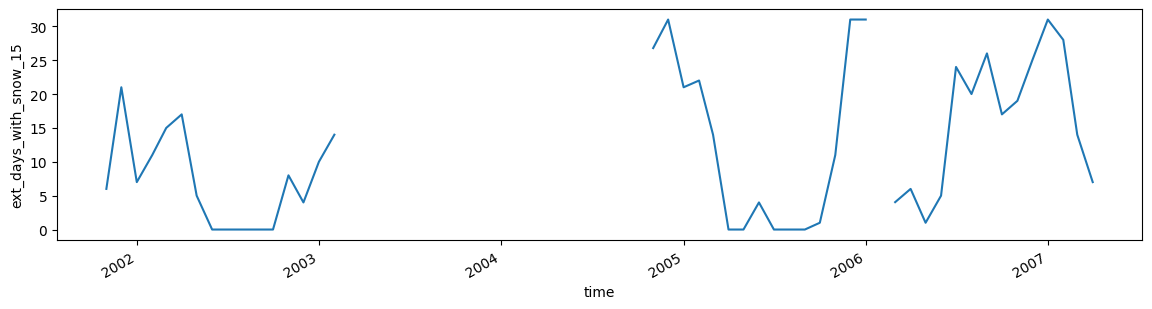

In [6]:
dic_data['TIZ']['in_situ']['ext_days_with_snow_15'].plot(figsize=(14,3))

In [7]:
mean_values = {prod:'prod' for prod in products_labels}        

In [ ]:
dic_data

In [8]:
# Monthly mean computing 
for prod in products_labels:   
    stations = {key:'stat' for key in stations_labels}
    for stat in stations_labels:   
        stations[stat] = dic_data[stat][prod].groupby('time.month').mean(dim='time')
    
    mean_values[prod] = stations
    print('Done for the product: '+prod)

Done for the product: in_situ
Done for the product: esa_gf
Done for the product: era5_land
Done for the product: era5
Done for the product: SIM_35km
Done for the product: EC-Earth3P-HR
Done for the product: IPSL-CM6A-ATM-HR
Done for the product: BCC-CSM2-HR
Done for the product: IPSL-CM6A-ATM-ICO-HR
Done for the product: IPSL-CM6A-ATM-ICO-VHR
Done for the product: CNRM-CM6-1-HR


In [9]:
years_number = {stat:'prod' for stat in stations_labels}

In [10]:
# Number of years served to compute the metrics 
stations = {key:'stat' for key in stations_labels}

for stat in stations_labels:   
    years_number[stat] = dic_data[stat]['esa_gf'].groupby('time.month').count(dim='time')

## Plots

In [11]:
# We define a function for figures formating 
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

### Monthly averages scatter plot

In [12]:
Boxplots = {stat:'data' for stat in stations_labels}

In [13]:
for stat in stations_labels:
    Boxplots[stat] = pd.DataFrame(columns=['month']+[prod for prod in products_labels])
    for m in [9,10,11,12,1,2,3,4,5,6,7,8]:
        aux = pd.DataFrame(columns=['month']+[prod for prod in products_labels])
        aux['month'] = [m-1]                           
        
        for prod in products_labels:
            aux[prod] = [dic_data[stat][prod].groupby('time.month')[m].to_dataframe().mean()[par]]
            Boxplots[stat] = pd.concat([Boxplots[stat], aux], axis=0)
        
    Boxplots[stat] = pd.melt(Boxplots[stat], id_vars="month")
    Boxplots[stat].sort_values(["month", "variable"], inplace=True)

In [14]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=2, dpi=500) #  
plt.subplots_adjust(wspace=0.14,hspace=0.2)
set_size(14,16) 

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
for istat,stat in enumerate(stations_labels):
    for prod in products_labels:
        data1 = Boxplots[stat].set_index(['variable', 'month']).loc[[prod]].reset_index()
        for i in range(len(data1['month'])):
            if data1['month'][i] >= 8:
                data1['month'][i] = data1['month'][i]-8
            else:
                data1['month'][i] = data1['month'][i]+ 4
            
        axs[istat].scatter(x='month', y='value',alpha=.9,s=60,c=colors_markers[prod],marker=keys_dic_markers[prod],
                            data=data1)
             
    axs[istat].set_title(stations_titles[stat], fontsize=15)
    axs[istat].set_ylabel('')                        
    axs[istat].set_ylim(0,35)                     
    axs[istat].set_xlabel('')                      
    axs[istat].set_xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11])  
    axs[istat].set_xticklabels(['SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR',
                                'APR', 'MAY', 'JUN', 'JUL', 'AUG'], fontsize=12)
    axs[istat].set_yticks(ticks = [0,5,10,15,20,25,30,35])
    axs[istat].set_yticklabels(labels=[0,5,10,15,20,25,30,35], rotation = 'horizontal', fontsize=14)    

    axs[istat].legend(labels ='')                 
     
    # The second axe (y-right)
    ax2 = axs[istat].twinx()
    data2 = years_number[stat][par].to_dataframe().reset_index()
    for i in range(len(data2['month'])):
        if data2['month'][i] >= 9:
            data2['month'][i] = data2['month'][i]-9
        else:
            data2['month'][i] = data2['month'][i]+3
            
    data2.sort_values(by='month').set_index('month').plot.line(ax=ax2, color="black", marker='d', linewidth=0.6)
    ax2.set_ylabel("", fontsize=18)
    ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
    ax2.set_ylim(0,35)
    ax2.set_yticks(ticks = [0,5,10,15,20,25,30,35])
    ax2.set_yticklabels(labels=[0,5,10,15,20,25,30,35], rotation = 'horizontal', fontsize=16)    
    if istat == 3:
        ax2.set_ylabel('number of years', fontsize=18) 
    
# fig.suptitle('\n '+par, fontsize=22)              
fig.legend(labels=products_labels, ncol=6, fontsize=12, loc='upper center', bbox_to_anchor=(0.51, 0.93))
axs[4].set_xlabel(" "*100+'months', fontsize=16)
axs[2].set_ylabel('number of days/month', fontsize=18) 
                                                  
#  Storing files in two formats pdf and png     
#plt.savefig(path_output + '/comparison_scatter_local_scale_threshold_snc_'+threshold_snc+'_threshold_snd_'+threshold_snd+'.png')
#plt.savefig(path_output + '/comparison_scatter_local_scale_threshold_snc_'+threshold_snc+'_threshold_snd_'+threshold_snd+'.pdf')

/tmp/ipykernel_29746/3299979611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'][i] = data1['month'][i]+ 4
/tmp/ipykernel_29746/3299979611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'][i] = data1['month'][i]-8
/tmp/ipykernel_29746/3299979611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'][i] = data1['month'][i]+ 4
/tmp/ipykernel_29746/3299979611.py:13: SettingWithCopyWarning:

Text(0, 0.5, 'number of days/month')

/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/li